In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
  
fn = 'data/commute_1.csv'


df = pd.read_csv(fn)



In [3]:
df

,date,dow,temp,conditions,commute_type
0,11/28/2022,Monday,20,sun,walk
1,11/29/2022,Tuesday,25,sun,walk
2,11/30/2022,Wednesday,40,sun,bike
3,12/1/2022,Thursday,45,partly sunny,bike
4,12/2/2022,Friday,33,partly sunny,walk
5,12/6/2022,Tuesday,44,rain,car
6,12/7/2022,Wednesday,45,rain,car
7,12/8/2022,Thursday,50,rain,car
8,12/13/2022,Tuesday,32,cloudy,walk
9,12/14/2022,Wednesday,40,cloudy,walk


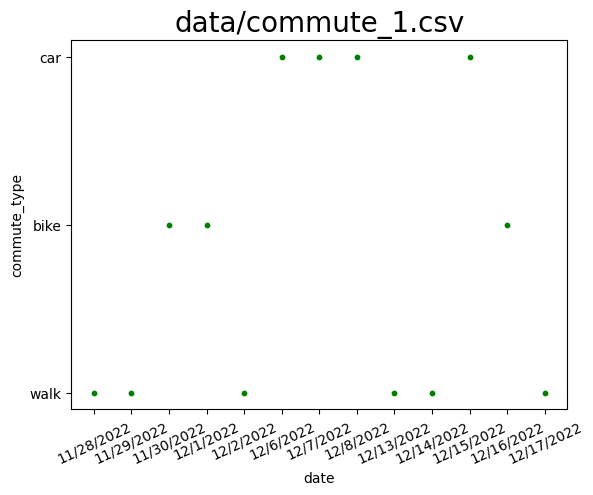

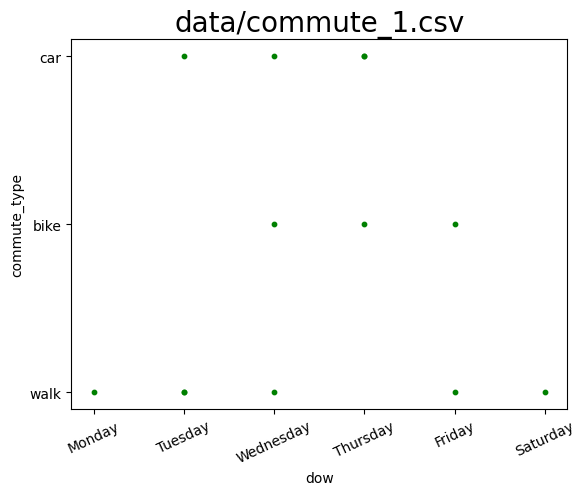

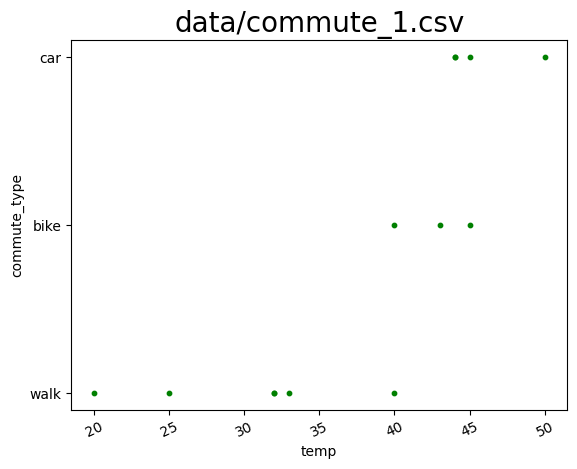

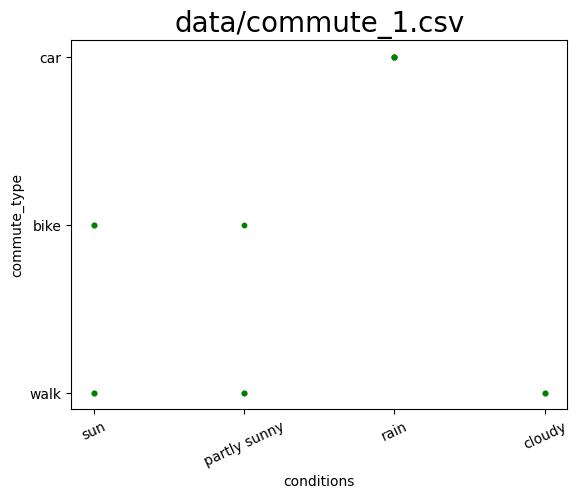

In [4]:
x_cols = [0,1,2,3]
y_col = 4

for x_col in x_cols:
    plt.scatter(df[df.columns[x_col]],df[df.columns[y_col]], color = 'g',s = 10)
    plt.xticks(rotation = 25)
    plt.xlabel(df.columns[x_col])
    plt.ylabel(df.columns[y_col])
    plt.title(fn, fontsize = 20)
    
    plt.show()

In [5]:
df = pd.read_csv(fn).drop(columns=['date'],axis=1)
cols = pd.get_dummies(df['dow'])
df = df.merge(cols,right_index=True,left_index=True).drop(columns=['dow'],axis=1)
df['commute_type'], uniques = pd.factorize(df['commute_type'])
df['conditions'] = df['conditions'].map({'sun':10,'partly sunny':20,'cloudy':50,'rain': 80})
df

,temp,conditions,commute_type,Friday,Monday,Saturday,Thursday,Tuesday,Wednesday
0,20,10,0,0,1,0,0,0,0
1,25,10,0,0,0,0,0,1,0
2,40,10,1,0,0,0,0,0,1
3,45,20,1,0,0,0,1,0,0
4,33,20,0,1,0,0,0,0,0
5,44,80,2,0,0,0,0,1,0
6,45,80,2,0,0,0,0,0,1
7,50,80,2,0,0,0,1,0,0
8,32,50,0,0,0,0,0,1,0
9,40,50,0,0,0,0,0,0,1


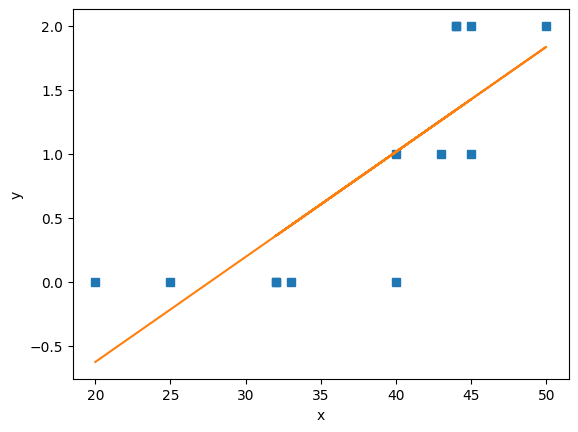

In [6]:
import scipy
x_col,y_col = [0,2]
x = df[df.columns[x_col]]
y = df[df.columns[y_col]]

slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s')
ax.plot(x, intercept + slope * x)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

In [7]:
import numpy as np
import scipy.stats

x = df['temp']
y = df['commute_type']
scipy.stats.spearmanr(x, y) 
#The p-value is the probability of observing a non-zero correlation 
# coefficient in our sample data when 
# in fact the null hypothesis is true. 
# A low p-value would lead you to reject the null hypothesis.
#  A typical threshold for rejection of the null hypothesis is a p-value of 0.05.

SpearmanrResult(correlation=0.8700838208926704, pvalue=0.00011015371395006159)

In [8]:
import numpy as np
import scipy.stats

x = df['Monday']
y = df['commute_type']
scipy.stats.spearmanr(x, y) 

SpearmanrResult(correlation=-0.2902744550580696, pvalue=0.3360102064754019)

In [9]:
import numpy as np
import scipy.stats

xyz = np.array([df['temp'],#x
                 df['commute_type'],#y
                 df['conditions']]) #z
corr_mat,p_mat = scipy.stats.spearmanr(xyz,axis=1) 
corr_mat

array([[1.        , 0.87008382, 0.64120503],
       [0.87008382, 1.        , 0.60591271],
       [0.64120503, 0.60591271, 1.        ]])

In [10]:
corr = df.corr()
corr

,temp,conditions,commute_type,Friday,Monday,Saturday,Thursday,Tuesday,Wednesday
temp,1.000000,0.611964,0.806411,0.003864,-0.609455,-0.201408,0.542612,-0.274615,0.241529
conditions,0.611964,1.000000,0.722013,-0.359980,-0.292449,-0.194966,0.369922,0.123307,0.123307
commute_type,0.806411,0.722013,1.000000,-0.170941,-0.282889,-0.282889,0.520480,-0.113855,0.097590
Friday,0.003864,-0.359980,-0.170941,1.000000,-0.123091,-0.123091,-0.233550,-0.233550,-0.233550
Monday,-0.609455,-0.292449,-0.282889,-0.123091,1.000000,-0.083333,-0.158114,-0.158114,-0.158114
Saturday,-0.201408,-0.194966,-0.282889,-0.123091,-0.083333,1.000000,-0.158114,-0.158114,-0.158114
Thursday,0.542612,0.369922,0.520480,-0.233550,-0.158114,-0.158114,1.000000,-0.300000,-0.300000
Tuesday,-0.274615,0.123307,-0.113855,-0.233550,-0.158114,-0.158114,-0.300000,1.000000,-0.300000
Wednesday,0.241529,0.123307,0.097590,-0.233550,-0.158114,-0.158114,-0.300000,-0.300000,1.000000


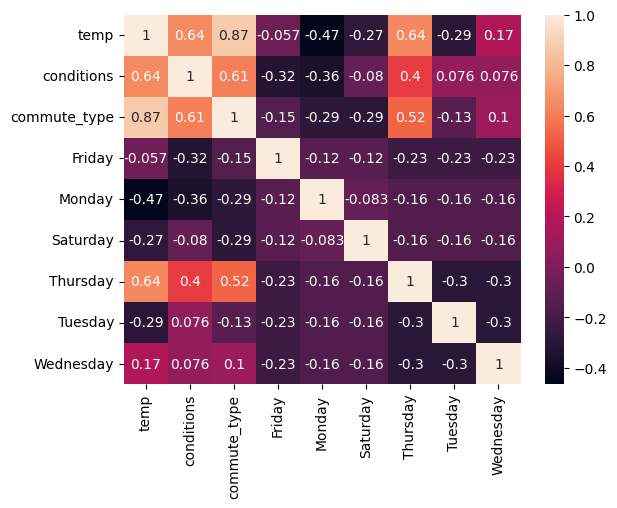

In [11]:
import seaborn as sn
import matplotlib.pyplot as plt
corr = df.corr(method='spearman')
sn.heatmap(corr, annot=True)
plt.show()

In [12]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
import random


melbourne_file_path = 'data/melb_data.csv'
original_df = pd.read_csv(melbourne_file_path)
df = original_df.copy()
print(df.shape[0])
df = df.dropna(axis=0).reset_index()
df2 = df.dropna(axis=0).reset_index()
print(df.shape[0])

df['Suburb'], uniques = pd.factorize(df['Suburb'])
codes, uniques = pd.factorize(df['CouncilArea'])
print(uniques)

df['CouncilArea'] = codes
#print(df.head())

y = df['Price']

features = ['Rooms', 'Suburb',
        'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea','CouncilArea']

X = df[features]
data = X.copy()

13580
6196
Index(['Yarra', 'Moonee Valley', 'Port Phillip', 'Darebin', 'Hobsons Bay',
       'Stonnington', 'Boroondara', 'Monash', 'Glen Eira', 'Whitehorse',
       'Maribyrnong', 'Bayside', 'Moreland', 'Manningham', 'Banyule',
       'Kingston', 'Brimbank', 'Melbourne', 'Hume', 'Knox', 'Melton',
       'Maroondah', 'Greater Dandenong', 'Nillumbik', 'Whittlesea',
       'Frankston', 'Macedon Ranges', 'Yarra Ranges', 'Wyndham', 'Casey',
       'Cardinia'],
      dtype='object')


In [13]:
df

,index,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,1,0,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,...,1.0,0.0,156.0,79.00,1900.0,0,-37.80790,144.99340,Northern Metropolitan,4019.0
1,2,0,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,...,2.0,0.0,134.0,150.00,1900.0,0,-37.80930,144.99440,Northern Metropolitan,4019.0
2,4,0,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,...,1.0,2.0,120.0,142.00,2014.0,0,-37.80720,144.99410,Northern Metropolitan,4019.0
3,6,0,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,...,2.0,0.0,245.0,210.00,1910.0,0,-37.80240,144.99930,Northern Metropolitan,4019.0
4,7,0,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,...,1.0,2.0,256.0,107.00,1890.0,0,-37.80600,144.99540,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6191,12205,286,30 Sherwin St,3,h,601000.0,S,Ray,29/07/2017,35.5,...,2.0,1.0,972.0,149.00,1996.0,24,-37.51232,145.13282,Northern Victoria,2170.0
6192,12206,103,75 Cecil St,3,h,1050000.0,VB,Williams,29/07/2017,6.8,...,1.0,0.0,179.0,115.00,1890.0,4,-37.86558,144.90474,Western Metropolitan,6380.0
6193,12207,103,2/29 Dover Rd,1,u,385000.0,SP,Williams,29/07/2017,6.8,...,1.0,1.0,0.0,35.64,1967.0,4,-37.85588,144.89936,Western Metropolitan,6380.0
6194,12209,105,201/152 Peel St,2,u,560000.0,PI,hockingstuart,29/07/2017,4.6,...,1.0,1.0,0.0,61.60,2012.0,5,-37.85581,144.99025,Southern Metropolitan,4380.0


In [14]:
data.head()

,Rooms,Suburb,Bedroom2,Bathroom,Car,Landsize,BuildingArea,CouncilArea
0,2,0,2.0,1.0,0.0,156.0,79.0,0
1,3,0,3.0,2.0,0.0,134.0,150.0,0
2,4,0,3.0,1.0,2.0,120.0,142.0,0
3,3,0,4.0,2.0,0.0,245.0,210.0,0
4,2,0,2.0,1.0,2.0,256.0,107.0,0


In [15]:
scaled_data = preprocessing.scale(data)  # use data.T if samples are columns instead of rows
scaled_data

array([[-0.95922445, -1.39040493, -0.92995401, ..., -0.35103059,
        -0.6888734 , -1.38856127],
       [ 0.0706412 , -1.39040493,  0.10099876, ..., -0.37554647,
         0.09282823, -1.38856127],
       [ 1.10050686, -1.39040493,  0.10099876, ..., -0.39114749,
         0.00474917, -1.38856127],
       ...,
       [-1.9890901 ,  0.48487587, -1.96090678, ..., -0.52487048,
        -1.1662619 , -0.74705766],
       [-0.95922445,  0.52128909, -0.92995401, ..., -0.52487048,
        -0.88044535, -0.58668176],
       [ 3.16023816,  0.55770231,  3.19385708, ...,  0.68643697,
         2.71868513,  0.21519775]])

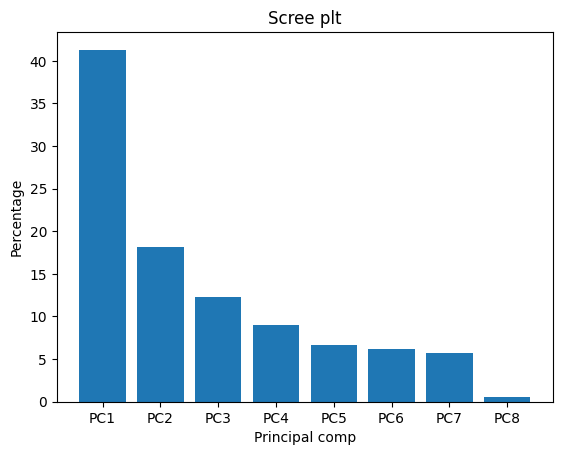

In [16]:
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

per_var = np.round(pca.explained_variance_ratio_* 100,decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]

plt.bar(x = range(1,len(per_var)+1),height=per_var,tick_label = labels)
plt.ylabel('Percentage')
plt.xlabel('Principal comp')
plt.title('Scree plt')
plt.show()

In [17]:
pca_data

array([[-2.4568575 , -1.71665092, -0.17714845, ..., -0.11587839,
         0.12576807,  0.03471628],
       [-0.49796645, -2.13013935, -0.48303943, ..., -0.11696082,
        -0.32492135,  0.0325498 ],
       [ 0.09128857, -1.8546342 , -0.17262664, ..., -0.79939167,
         0.97839661, -0.69246098],
       ...,
       [-3.12502638,  0.22245988, -0.16879901, ...,  0.42511929,
        -0.25446883,  0.00883643],
       [-1.94001892,  0.22412906, -0.35347871, ..., -0.19619284,
         0.17026819,  0.01109285],
       [ 5.47968059, -0.3503223 , -0.05238025, ..., -0.21864179,
         0.67427108,  0.04118278]])

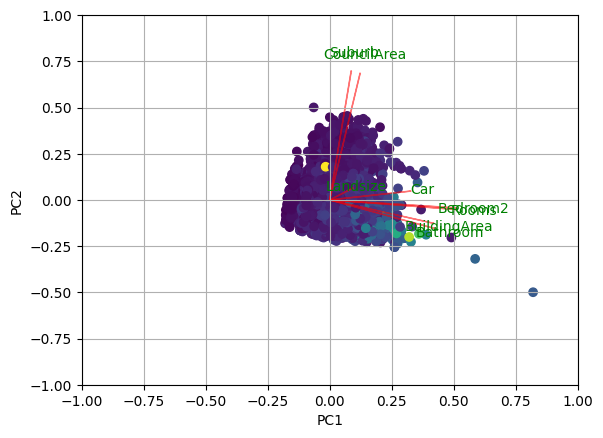

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler


X = X
Y = y
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(pca_data,np.transpose(pca.components_),features)
plt.show()